### 8.2.3 Now get creative
Using one or more of the datasets we have been using, ask two or more research questions, make appropriate model(s), and test your model(s) using regression. 
You might pick one easy and one hard research question. You might start with a simple linear model, but feel free to branch out to a non-linear model, or fancy statistics tests if you feel confident about doing so and can explain them. The point is that you are designing the modeling, not following a tutorial, and that you develop expertise on the methods you are using so you can defend their usage.

Places to look for inspiration:
- https://scipy-lectures.org/packages/statistics/index.html
- https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html
- https://www.statsmodels.org/dev/examples/index.html

etc...


### Homework
As before, you will present your analysis to the class. Put a cleaned up version of your code, suitable for presentation, in a new notebook called HW_8_yourname. You will present this next Tuesday afternoon, after Riley's lecture.

# Homework

## Data exploration

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn import datasets

In [3]:
# read in boston data
data = datasets.load_boston()
df = pd.DataFrame(data.data, columns=data.feature_names) 
df_tar = pd.DataFrame(data.data, columns=data.feature_names) 
target = pd.DataFrame(data.target, columns=['MEDV'])
df_tar['MEDV'] = pd.DataFrame(data.target, columns=['MEDV'])

In [4]:
df_tar.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


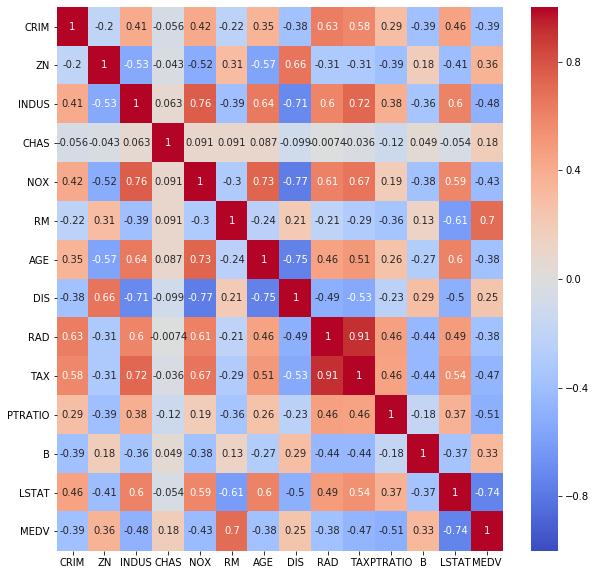

In [5]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(df_tar.corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True);

In [6]:
np.corrcoef(df["TAX"], df["RAD"])

array([[1.        , 0.91022819],
       [0.91022819, 1.        ]])

In [7]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(df["TAX"], df["RAD"])

In [8]:
r_value

0.9102281885331838

## Q1: Methods - Using multiple degrees in polynomial regression

Line fitting for Rooms and Housing Value

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()


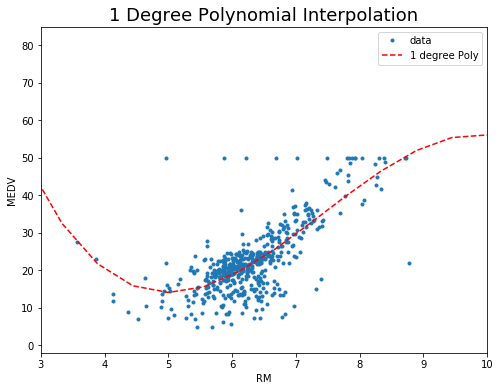

In [150]:
# creating x and y data
import numpy as np
x = df_tar.RM
y = df_tar.MEDV
z = np.polyfit(x, y, 3)

# creating polynomial functions
p = np.poly1d(z)

# 30 degree polynomial
p30 = np.poly1d(np.polyfit(x, y, 30))

# input values for our linear equations
xp = np.linspace(0, 55, 100)

# plotting
plt.figure(figsize=(8,6))
plt.plot(x, y, '.', label='data')
plt.plot(xp, p(xp), 'r--', label='1 degree Poly')


plt.ylim(-2, 85)
plt.xlim(3, 10)
plt.title("1 Degree Polynomial Interpolation", fontsize=18)
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.legend()

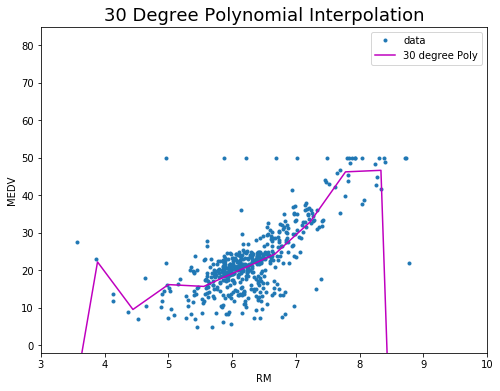

In [151]:
# plotting 1 degree poly.
plt.figure(figsize=(8,6))
plt.plot(x, y, '.', label='data')

#creating a 30 degree polynomial equation
plt.plot(xp, p30(xp), 'm-', label='30 degree Poly')


plt.ylim(-2, 85)
plt.xlim(3, 10)
plt.title("30 Degree Polynomial Interpolation", fontsize=18)
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.legend()


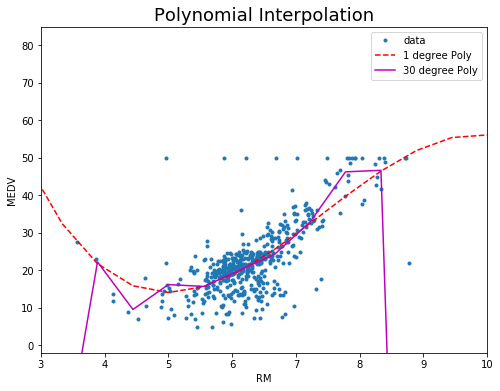

In [152]:
# plotting 30 degree poly.
plt.figure(figsize=(8,6))
plt.plot(x, y, '.', label='data')
plt.plot(xp, p(xp), 'r--', label='1 degree Poly')
plt.plot(xp, p30(xp), 'm-', label='30 degree Poly')


plt.ylim(-2, 85)
plt.xlim(3, 10)
plt.title("Polynomial Interpolation", fontsize=18)
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.legend()


## Q2 TED: Views and Rating Predction
applying same method to 'view' and 'ratings' in TED talk data

In [168]:
ted_gen = pd.read_csv("ted_gen.csv")

In [169]:
df= pd.concat([ted_tube, rating_speaker, gender], axis=1)

In [170]:
df = df.drop(['published_date', 'Unnamed: 0'], axis=1)
df = df.loc[:,~df.columns.duplicated()]

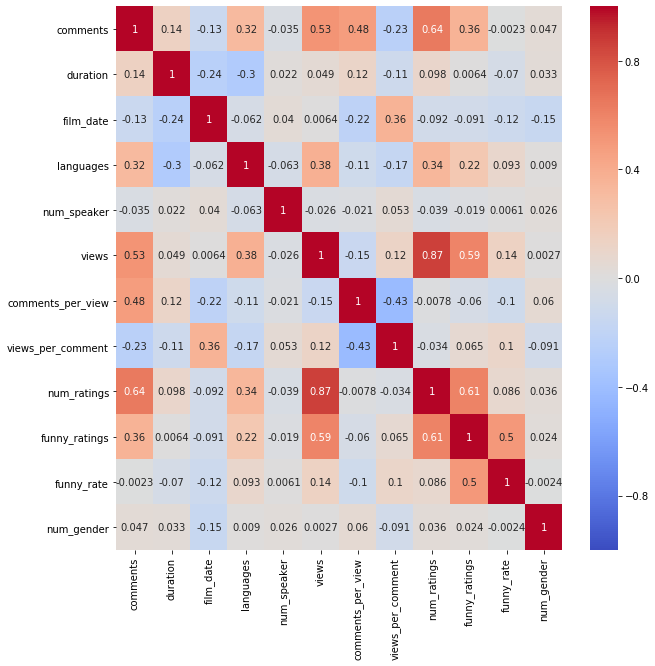

In [171]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True);

//anaconda3/lib/python3.7/site-packages/numpy/lib/polynomial.py:626: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RankWarning: Polyfit may be poorly conditioned
  


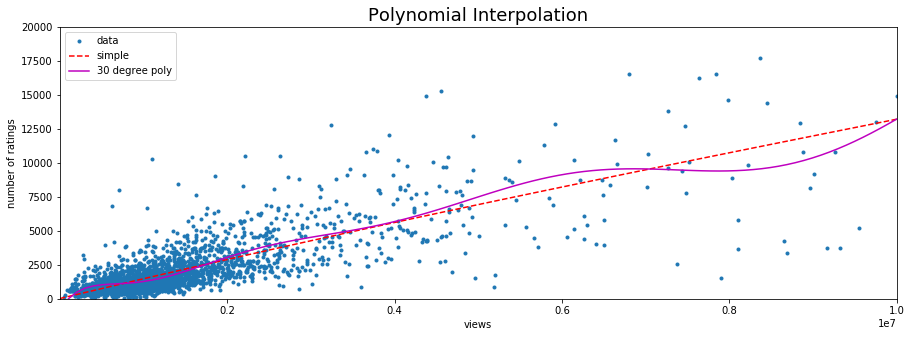

In [203]:
xted = df.views
yted = df.num_ratings
zted = np.polyfit(xted, yted, 3)

pted = np.poly1d(zted)

# 30 degree polynomial
pted30 = np.poly1d(np.polyfit(xted, yted, 30))

xpted = np.linspace(0, 10000000, 100)

# plotting
plt.figure(figsize=(15, 5))
plt.plot(xted, yted, '.', label='data')
plt.plot(xpted, pted(xpted), 'r--', label='simple')
plt.plot(xpted, pted30(xpted), 'm-', label='30 degree poly')


plt.ylim(0, 20000)
plt.xlim(3, 10000000)
plt.title("Polynomial Interpolation", fontsize=18)
plt.xlabel('views')
plt.ylabel('number of ratings')
plt.legend()

In [195]:
# normalizing data between 0 and 1

from sklearn import preprocessing

df_num = df[['views', 'num_ratings']]

x = df_num.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_num = pd.DataFrame(x_scaled)

//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RankWarning: Polyfit may be poorly conditioned
  


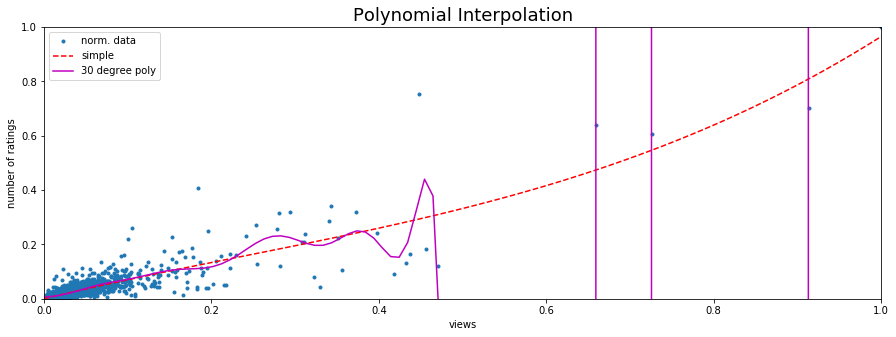

In [200]:
# same thing but using normalized data

xted = df_num[0]
yted = df_num[1]
zted = np.polyfit(xted, yted, 3)

pted = np.poly1d(zted)

# 30 degree polynomial
pted30 = np.poly1d(np.polyfit(xted, yted, 30))

xpted = np.linspace(0, 1, 100)

# plotting
plt.figure(figsize=(15, 5))
plt.plot(xted, yted, '.', label='norm. data')
plt.plot(xpted, pted(xpted), 'r--', label='simple')
plt.plot(xpted, pted30(xpted), 'm-', label='30 degree poly')


plt.ylim(0, 1)
plt.xlim(0, 1)
plt.title("Polynomial Interpolation", fontsize=18)
plt.xlabel('views')
plt.ylabel('number of ratings')
plt.legend()